Text(0, 0.5, 'Flux Density')

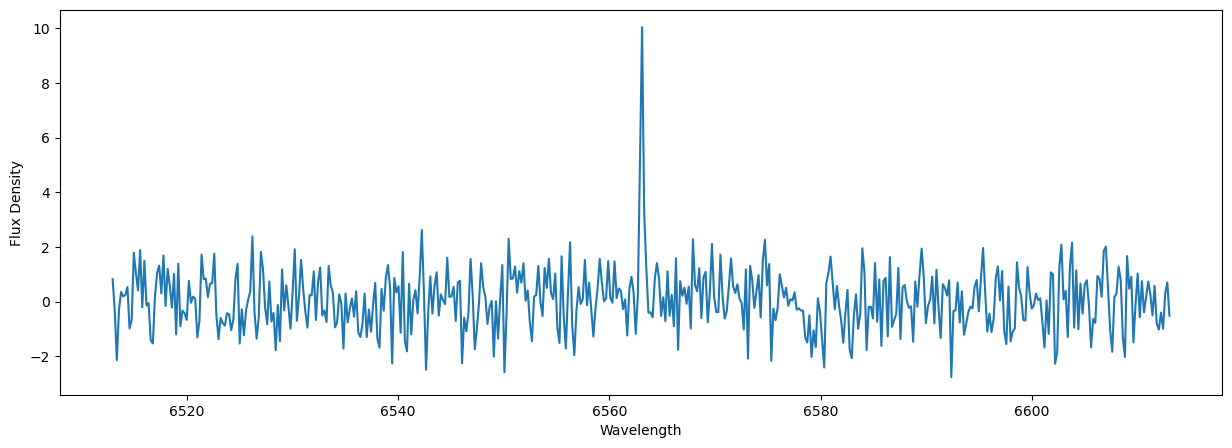

In [15]:
import numpy as np
import matplotlib.pyplot as plt

wl = np.linspace(6500, 6600, 500) + 13
flux = np.zeros_like(wl)
flux[247] = 0.11
flux[248] = 1.2
flux[249] = 4.95
flux[250] = 10
flux[251] = 5.01
flux[252] = 1.1
flux[253] = 0.1
noise = np.random.normal(0, 1, size=flux.size)
flux += noise

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux)
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux Density")

(6550.0, 6570.0)

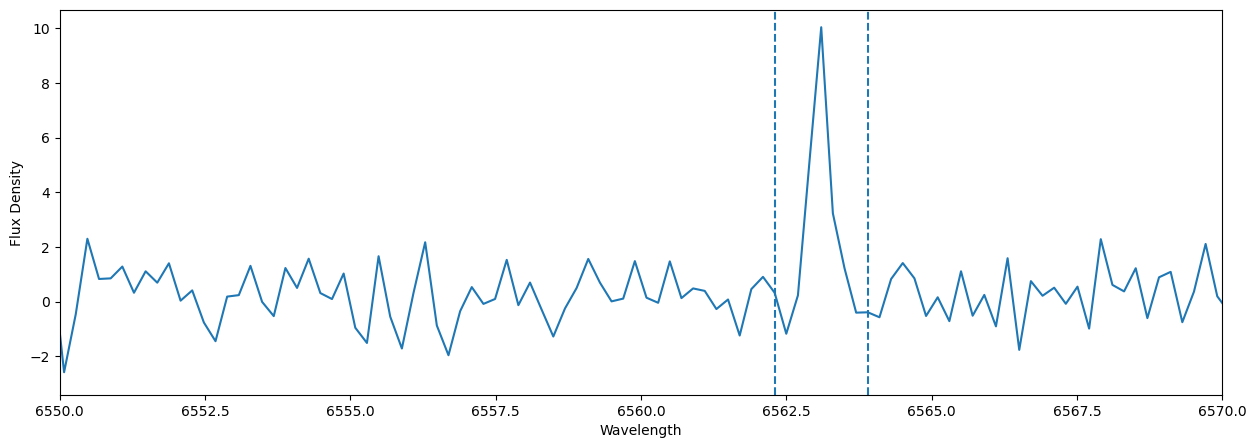

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wl, flux)
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux Density")
ax.axvline(wl[246], linestyle="--")
ax.axvline(wl[254], linestyle="--")
ax.set_xlim(6550, 6570)

In [17]:
from scipy.integrate import trapezoid

sub_wl = wl[246:254]
sub_fl = flux[246:254]
integral_trapz = trapezoid(sub_fl, sub_wl)
f"{integral_trapz:.4f}"

'3.7439'

In [18]:
from scipy.integrate import simpson

integral_simps = simpson(sub_fl, x=sub_wl)
f"{integral_simps:.4f}"

'3.4826'

In [19]:
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-np.power(x - loc, 2.0) / (2 * np.power(sigma, 2.0)))

(6550.0, 6570.0)

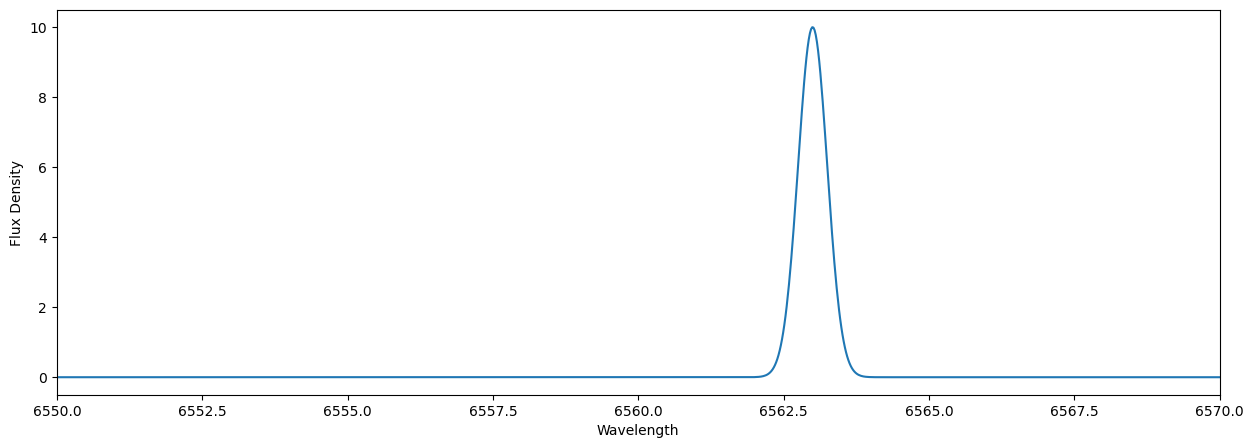

In [20]:
xx = np.linspace(6550, 6570, 1000)
gauss_test = gauss(xx, 10, 6563, 0.25)
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(xx, gauss_test)
ax.set_xlabel("Wavelength")
ax.set_ylabel("Flux Density")
ax.set_xlim(6550, 6570)

In [21]:
from scipy.integrate import quad

res = quad(func=gauss, a=6560, b=6565, args=(10, 6563, 0.25))
f"{res[0]:.4f}"

'6.2666'

In [22]:
true_integral = 10 * np.sqrt(2 * np.pi * 0.25**2)
f"{true_integral:.4f}"

'6.2666'